# Image classification

In [1]:
# fmnist dataset image classification using CNN architecture

# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check the tensorflow version
print(tf.__version__)

2.19.0


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [4]:
# load the fmnist dataset

fasion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# seprating the training images from the test images and labels
(train_images, train_labels), (test_images, test_labels) = fasion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 21s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [5]:
# shape of each dataset
print("Train Images: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test Images: ", test_images.shape)
print("Test Labels: ", test_labels.shape)

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)


Text(0.5, 0, '8')

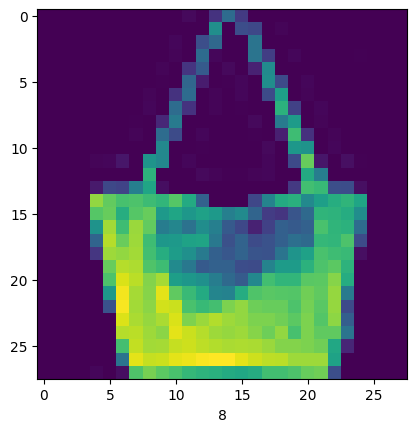

In [8]:
plt.imshow(train_images[56400])
plt.xlabel(train_labels[56400])

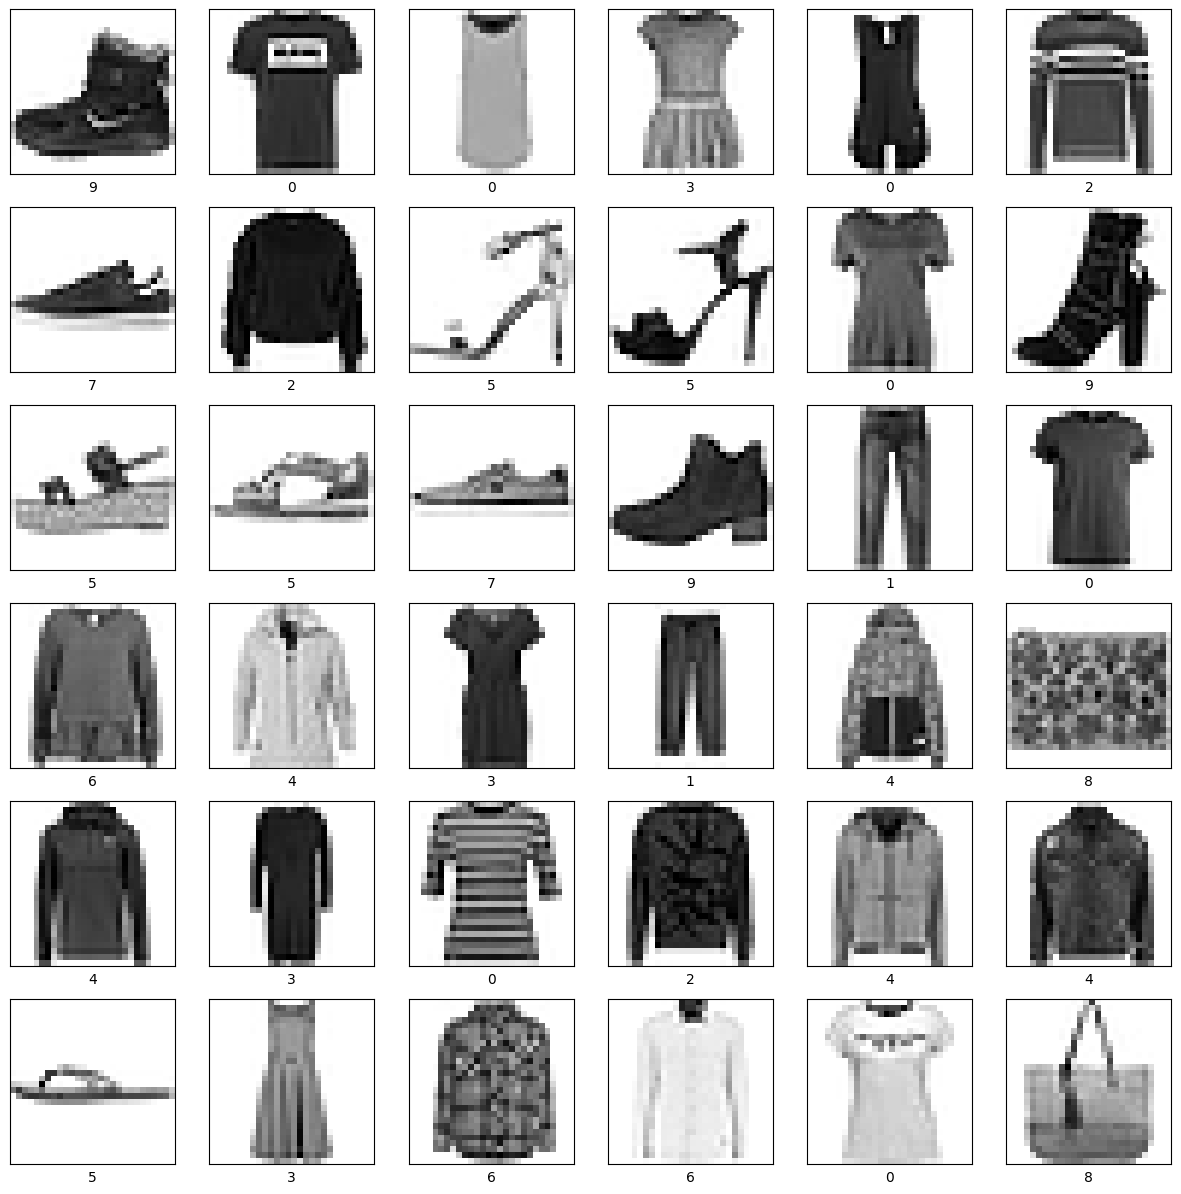

In [7]:
# Display some sample images
plt.figure(figsize=(15 , 15))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [9]:
len(train_images)

60000

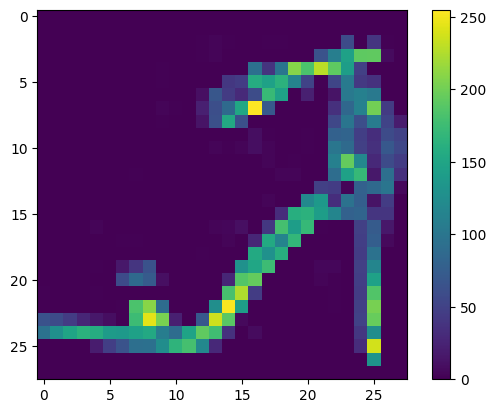

In [11]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[9]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0 164  50   0   7   0   0 
  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0   5   0  45 217 255 176   0   6   0   0 
  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2   0  62 236 231 215  27   0   1   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 244 231 234  74   0   1   0   0   0 
  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134 138 226 202 217  22   0   1   0   0   0 
  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241 177 199 205 210  26   0   1   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0   0   0 235 243 19

In [13]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

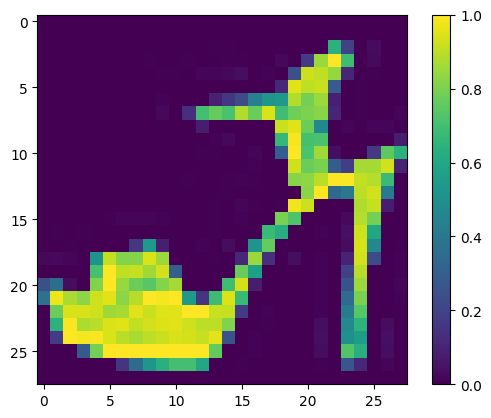

In [15]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

Pixel values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.00392 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.643 0.196 0.0 0.0275 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.0 0.00392 0.0 0.0 0.00392 0.00392 0.0 0.0 0.0196 0.0 0.176 0.851 1.0 0.69 0.0 0.0235 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.00392 0.0 0.0118 0.0118 0.0196 0.0353 0.0 0.00784 0.0 0.243 0.925 0.906 0.843 0.106 0.0 0.00392 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.114 0.957 0.906 0.918 0.29 0.0 0.00392 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00784 0.0 0.0 0.0 0.0902 0.161 0.231 0.435 0.525 0.541 0.886 0.792 0.851 0.0863 0.0 0.00392 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0196 0.0 0.137 0.702 0.765 0.714 0

<Figure size 640x480 with 0 Axes>

<Axes: >

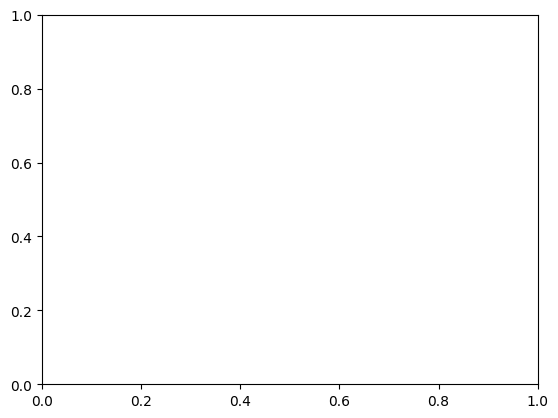

In [16]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[9]:
    for pixel in row:
        print("{:0.3}".format(pixel), end=" ")
    print()
display(plt.gcf())
display(plt.gca())

In [17]:
# Reshape the images to have a channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [18]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)), # input layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)), # pooling layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(), # pooling layer
    tf.keras.layers.Flatten(), # flatten layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,586 (96.04 KB)

 Trainable params: 24,586 (96.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time
# train the model
model.fit(train_images, train_labels, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.2300 - accuracy: 0.9170 - val_loss: 0.3130 - val_accuracy: 0.8902
Epoch 2/20
3000/3000 [==============================] - 35s 12ms/step - loss: 0.2151 - accuracy: 0.9213 - val_loss: 0.3072 - val_accuracy: 0.8922
Epoch 3/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.2065 - accuracy: 0.9243 - val_loss: 0.2851 - val_accuracy: 0.8994
Epoch 4/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.1960 - accuracy: 0.9279 - val_loss: 0.2663 - val_accuracy: 0.9061
Epoch 5/20
3000/3000 [==============================] - 35s 12ms/step - loss: 0.1868 - accuracy: 0.9314 - val_loss: 0.2931 - val_accuracy: 0.8988
Epoch 6/20
3000/3000 [==============================] - 35s 12ms/step - loss: 0.1798 - accuracy: 0.9347 - val_loss: 0.2940 - val_accuracy: 0.9018
Epoch 7/20
3000/3000 [==============================] - 35s 12ms/step - loss: 0.1715 - accuracy: 0.9367 - val_loss: 0.2914 -

In [115]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.2910 - accuracy: 0.8958 - 2s/epoch - 7ms/step

Test loss: 0.2909766137599945

Test accuracy: 0.895799994468689


In [131]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3919 - accuracy: 0.9000 - 2s/epoch - 7ms/step

Test loss: 0.3918829560279846

Test accuracy: 0.8999999761581421


In [116]:
# save the model
model.save('models/fashion_mnist_model.h5')

# Make predictions

In [120]:
test_images.shape

(10000, 28, 28, 1)

In [132]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [133]:
test_labels[50]

4

In [134]:
predictions[0]

array([3.02713098e-17, 4.18048923e-21, 6.14560718e-17, 2.52521350e-17,
       1.06131495e-16, 1.48694295e-12, 1.56428615e-15, 1.88954824e-10,
       1.82439632e-12, 1.00000000e+00], dtype=float32)

In [135]:
np.argmax(predictions[50])

4

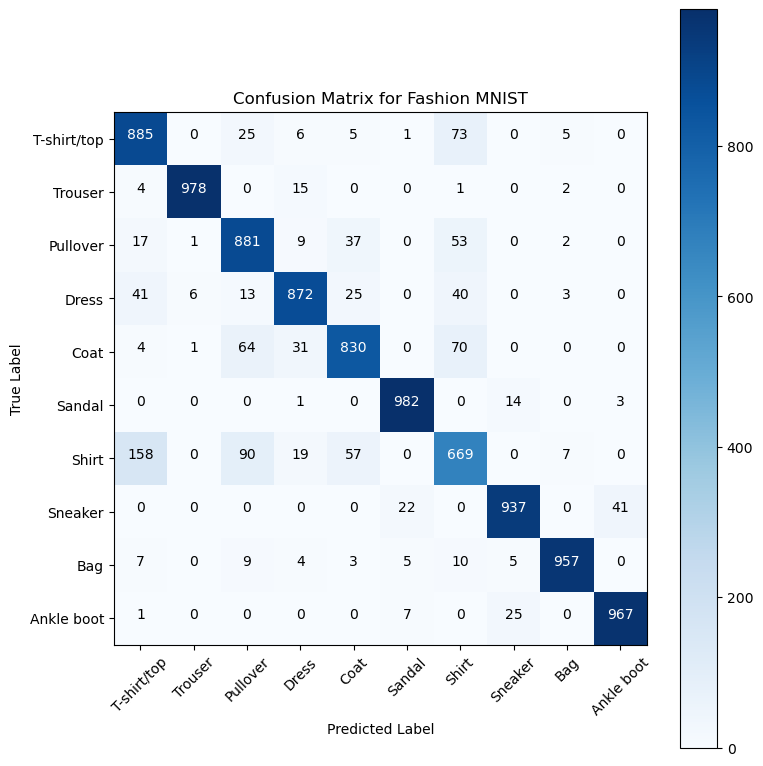

In [129]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)
# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


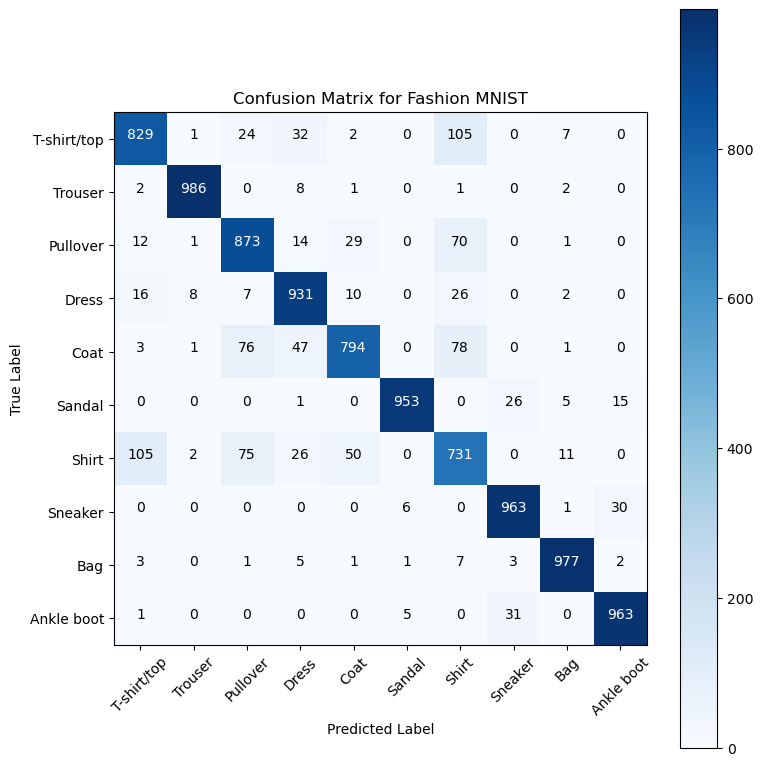

In [136]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)
# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


-----------------